Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков.

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IlyaShirmanov/Portfolio_Data_Science_Files/main/water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
#Первично ознакомимся с датасетом, посмотрим есть ли в нем проблемы.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


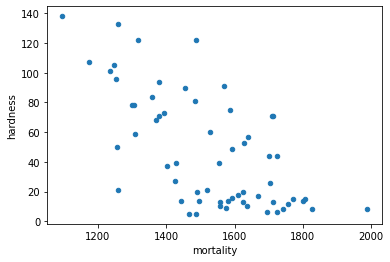

In [ ]:
#Построим точечный график
df.plot(kind='scatter', x='mortality', y='hardness')
#Видим взаимосвязь

In [ ]:
# Рассчитаем коэффициенты корреляции Пирсона и Спирмена
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
df[['mortality', 'hardness']].corr(method='spearman')
#Исходя из графика и коэффициентов видим сильную взаимосвязь

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
#Построим модель линейной регрессии

In [ ]:
X = df[['mortality']]
y = df['hardness']

In [ ]:
#Разделим нашу выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Обучим модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Посмотрим коэффициент А
model.coef_

array([-0.12670202])

In [ ]:
#Посмотрим коэффициет В
model.intercept_

239.3678426140957

In [ ]:
#Получим значения Y из тестовой выборки на основе обученя модели
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [ ]:
# Получим коэффициен детерминации
model.score(X_test, y_test) 
#Получился средний

0.4948982822876836

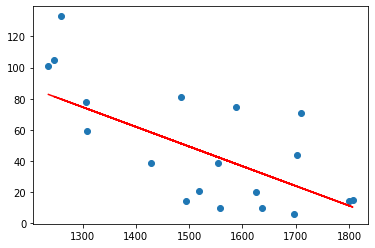

In [ ]:
#Построим график линейной регрессии совмесно с графиком по тестовой выборке
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

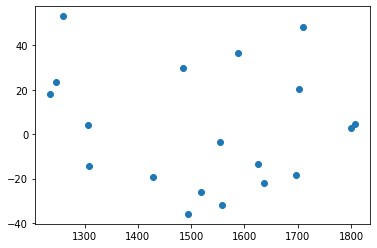

In [ ]:
#Выведим график остатков
plt.scatter(X_test, y_test.values - y_pred)
#Видим что остатки распределены хаотично

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
#Разделим данные на 2 группы
df_South = df.loc[df.location == 'South']
df_North = df.loc[df.location == 'North']

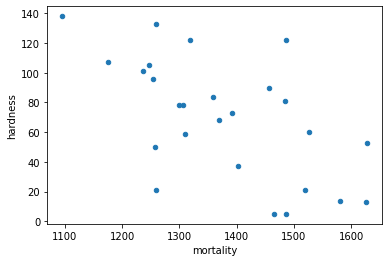

In [ ]:
#Построим точечные графики для юга и севера
df_South.plot(kind='scatter', x='mortality', y='hardness')

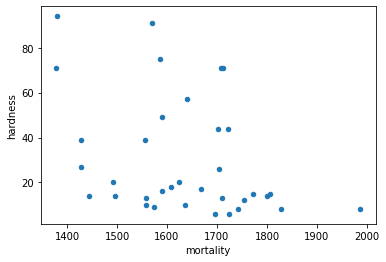

In [ ]:
df_North.plot(kind='scatter', x='mortality', y='hardness')
#Видим не сильную взаимосвязь

In [ ]:
# Рассчитаем коэффициенты корреляции Пирсона для юга и севера
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
df_North[['mortality', 'hardness']].corr()
#У юга кэффициент Пирсона гораздо меньше чем у севера

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# Рассчитаем коэффициенты корреляции Спирмена для юга и севера
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
df_North[['mortality', 'hardness']].corr(method='spearman')
#У юга кэффициент Спирмена гораздо меньше чем у севера

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
#Исходя из графиков и коэффициентов можно сделать предположение
#что у севера более жеская вода  и смертность ниже.

In [ ]:
#Построим модель линейной регрессии для юга

In [ ]:
X = df_South[['mortality']]
y = df_South['hardness']

In [ ]:
#Разделим нашу выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Обучим модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Посмотрим коэффициент А
model.coef_

array([-0.18112812])

In [ ]:
#Посмотрим коэффициет В
model.intercept_

324.1190746235986

In [ ]:
#Получим значения Y из тестовой выборки на основе обученя модели
y_pred = model.predict(X_test)
y_pred

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [ ]:
# Получим коэффициен детерминации
model.score(X_test, y_test) 
#Получился маленький

-0.05226615794483802

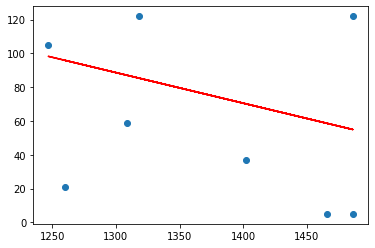

In [ ]:
#Построим график линейной регрессии совмесно с графиком по тестовой выборке
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

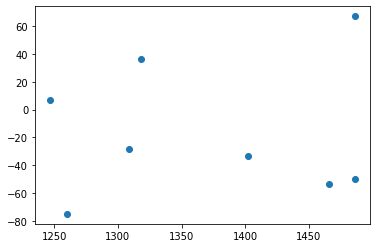

In [ ]:
#Выведим график остатков
plt.scatter(X_test, y_test.values - y_pred)
#Видим что остатки распределены хаотично

In [ ]:
#Построим модель линейной регрессии для севера

In [ ]:
X = df_North[['mortality']]
y = df_North['hardness']

In [ ]:
#Разделим нашу выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Обучим модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Посмотрим коэффициент А
model.coef_

array([-0.09774218])

In [ ]:
#Посмотрим коэффициет В
model.intercept_

191.7279767911201

In [ ]:
#Получим значения Y из тестовой выборки на основе обученя модели
y_pred = model.predict(X_test)
y_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [ ]:
# Получим коэффициен детерминации
model.score(X_test, y_test) 
#Получился маленький но больше чем у юга

-0.34863672627416764

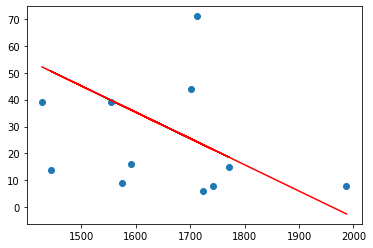

In [ ]:
#Построим график линейной регрессии совмесно с графиком по тестовой выборке
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

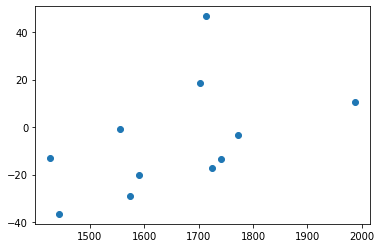

In [ ]:
#Выведим график остатков
plt.scatter(X_test, y_test.values - y_pred)
#Видим что остатки распределены не хаотично наблюдается зависимость

Выводы:

1. Модели плохо обучаются на выборке по югу и сереру отдельно возможно из-за небольшого объема данных и слабой корреляции, особенно на севере.
2. Можно сделать предположение что у севера более жеская вода и смертность ниже.
3. Если смотреть по отдельности только север и юг связь между жескостью воды и продолжительностью жизни плохо прослеживается, особенно на севере.
3. Но так как на сере и юге разная по жескости вода и продолжительность жизни, некая связь с жесткостью воды и продолжительностью жизни есть.